In [2]:
#Importing required libraries 
import numpy as np 
import os 
from collections import Counter
import pandas as pd
import nltk

# preprocessing 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# to build the net 
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalAveragePooling1D
from keras.layers import Dropout
from keras.layers import Activation

# to split data into training and testing 
from sklearn.model_selection import train_test_split



In [3]:
# Function to read a file 
def read_file(filepath):
    file = open(filepath, 'r', errors='ignore', encoding='utf8')
    line = file.read()
    file.close()
    return line 

In [4]:
# Function to read a folder of files and create one file 
def read_folder(folderpath,combined):
    # doc = []
    combined = open(combined, "w", encoding='utf8')
    for filepath in os.listdir(folderpath):
        file = folderpath + '\\' + filepath
        combined.write(read_file(file))
        combined.write("\n")

In [5]:
# Read the aclImdb Folder to extract positive and negative movie review and create 2 individual files respectively
read_folder(r'aclImdb\train\neg', r'combined_neg.txt')
read_folder(r'aclImdb\train\pos', r'combined_pos.txt')

# Create two pandas dataframes to store the postive and negative movie reviews
# Postive reviews
df_pos = pd.read_csv(r'combined_pos.txt', sep=";", names=['Text',])
df_pos['Label'] = 1

# negative movie reviews
df_neg = pd.read_csv(r'combined_neg.txt', sep=";", names=['Text',])
df_neg['Label'] = 0

# Combine the two dataframes 
merge = [df_pos, df_neg]
df = pd.concat(merge).reset_index(drop=True)

In [6]:
#Preview the dataframes 
print(df_pos.head())
print()
print(df_neg.head())
print()
print(df.head())

                                                Text  Label
0  Bromwell High is a cartoon comedy. It ran at t...      1
1  Homelessness (or Houselessness as George Carli...      1
2  Brilliant over-acting by Lesley Ann Warren. Be...      1
3  This is easily the most underrated film inn th...      1
4  This is not the typical Mel Brooks film. It wa...      1

                                                Text  Label
0  Story of a man who has unnatural feelings for ...      0
1  Airport '77 starts as a brand new luxury 747 p...      0
2  This film lacked something I couldn't put my f...      0
3  Sorry everyone,,, I know this is supposed to b...      0
4  When I was little my parents took me along to ...      0

                                                Text  Label
0  Bromwell High is a cartoon comedy. It ran at t...      1
1  Homelessness (or Houselessness as George Carli...      1
2  Brilliant over-acting by Lesley Ann Warren. Be...      1
3  This is easily the most underrated 

In [7]:
#preview the number of positive and negative Labels 
df['Label'].value_counts()

1    12494
0    12493
Name: Label, dtype: int64

In [8]:
# Function to clean the text by removing punctuations and english language stopwords 
from nltk.tokenize import word_tokenize
def clean_text(doc):
    stop_words = set(nltk.corpus.stopwords.words('english'))  
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    
    tokens = word_tokenize(doc)
    tokens = [word.lower() for word in tokens]
    txt = [word for word in tokens if word not in stop_words and (word.isalpha() == True) and (len(word)> 1) and (word != 'br')]
    final_txt = " ".join(map(str, txt))
    return final_txt

In [9]:
# Create a new dataframe for the cleaned text and call the clean_text function 
df_clean = df
df_clean['tokens'] = df_clean.apply(lambda row: clean_text(row['Text']),axis =1)

In [10]:
#preview the cleaned dataframe 
df_clean.head()

,Text,Label,tokens
0,Bromwell High is a cartoon comedy. It ran at t...,1,bromwell high cartoon comedy ran time programs...
1,Homelessness (or Houselessness as George Carli...,1,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,brilliant lesley ann warren best dramatic hobo...
3,This is easily the most underrated film inn th...,1,easily underrated film inn brooks cannon sure ...
4,This is not the typical Mel Brooks film. It wa...,1,typical mel brooks film much less slapstick mo...


In [11]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [12]:
print(train.shape)

(19989, 3)


In [13]:
print(test)

                                                    Text  Label  \
7442   I loved this movie. It was almost the same as ...      1   
2093   This film made for French TV deals with the tr...      1   
9052   This little-appreciated movie is one of my fav...      1   
7341   Didn't Mystic Pizza win the Oscar for that yea...      1   
21098  Look, I'm sorry if half the world takes offens...      0   
...                                                  ...    ...   
14819  Elfriede Jelinek, not quite a household name y...      0   
3214   I saw the latter half of this movie about a ye...      1   
1103   This is my first comment! This is a fantastic ...      1   
21727  Five passengers at a bus depot tell each other...      0   
19905  A typical Goth chick (Rainbow Harvest looking ...      0   

                                                  tokens  
7442   loved movie almost first cabin lake instead ki...  
2093   film made french tv deals tragic effect close ...  
9052   movie one f

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['tokens'])
encoded_train_data = tokenizer.texts_to_sequences(train['tokens'])
encoded_train_data_padded = pad_sequences(encoded_train_data, maxlen=100, padding='post')
print(encoded_train_data[0])
print()
print(encoded_train_data_padded[0])

[128, 1, 37, 620, 217, 41, 29, 285, 658, 33, 337, 990, 388, 19, 620, 1, 75, 9022, 519, 544, 734, 1207, 5149]

[ 128    1   37  620  217   41   29  285  658   33  337  990  388   19
  620    1   75 9022  519  544  734 1207 5149    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [15]:
# Use the GloVE word wmbeddings file as pretrained word embeddings
word_embeddings = {}
file = open(r'glove.6B.100d.txt', encoding='utf8')
for line in file:
    val = line.split()
    word = val[0]
    coefs = np.asarray(val[1:], dtype = 'float32')
    word_embeddings[word] = coefs
file.close()
print('Number of word embeddings:' + str(len(word_embeddings)))

Number of word embeddings:400001


In [16]:
# create a embedding matrix by using words only found in the dataset 
words_in_data = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((words_in_data, 100))
for word, i in tokenizer.word_index.items():
    temp = word_embeddings.get(word)
    if temp is not None:
        embedding_matrix[i] = temp

In [17]:
# Embedding layer for the neural network 
embedding = Embedding(words_in_data, 100, weights=[embedding_matrix], input_length= 100, trainable= False)

In [59]:
nn = Sequential()
nn.add(embedding)
# nn.add(Dropout(0.2))
# nn.add(Conv1D(64, 5, activation='relu'))
# nn.add(Dropout(0.2))
# nn.add(MaxPooling1D(4))
# nn.add(Conv1D(64, 5, activation='relu'))
# nn.add(Dropout(0.3))
# nn.add(MaxPooling1D(4))
# nn.add(Conv1D(64, 5, activation='relu'))
# nn.add(GlobalMaxPooling1D())
# nn.add(Dense(1, activation='sigmoid'))
nn.add(Conv1D(64, 5, activation='relu'))
nn.add(GlobalAveragePooling1D())
nn.add(Dense(1, activation='sigmoid'))
nn.summary()
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          6126800   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 64)            32064     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 6,158,929
Trainable params: 32,129
Non-trainable params: 6,126,800
_________________________________________________________________


In [60]:
print(len(encoded_train_data_padded))
print(len(train['Label']))

19989
19989


In [61]:
history = nn.fit(encoded_train_data_padded, train["Label"],
          epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
125/125 [==============================] - 4s 31ms/step - loss: 0.5550 - accuracy: 0.7262 - val_loss: 0.5031 - val_accuracy: 0.7619
Epoch 2/50
125/125 [==============================] - 4s 30ms/step - loss: 0.4939 - accuracy: 0.7669 - val_loss: 0.5019 - val_accuracy: 0.7604
Epoch 3/50
125/125 [==============================] - 4s 30ms/step - loss: 0.4794 - accuracy: 0.7748 - val_loss: 0.4771 - val_accuracy: 0.7746
Epoch 4/50
125/125 [==============================] - 4s 30ms/step - loss: 0.4724 - accuracy: 0.7799 - val_loss: 0.4733 - val_accuracy: 0.7781
Epoch 5/50
125/125 [==============================] - 4s 30ms/step - loss: 0.4625 - accuracy: 0.7851 - val_loss: 0.4744 - val_accuracy: 0.7779
Epoch 6/50
125/125 [==============================] - 4s 30ms/step - loss: 0.4582 - accuracy: 0.7865 - val_loss: 0.4643 - val_accuracy: 0.7846
Epoch 7/50
125/125 [==============================] - 4s 30ms/step - loss: 0.4510 - accuracy: 0.7913 - val_loss: 0.4578 - val_accuracy: 0.7891

In [62]:
loss, accuracy = nn.evaluate(encoded_train_data_padded, train['Label'], verbose=0)

In [81]:
print('Accuracy: ' +  str((accuracy*100)))

Accuracy: 86.87778115272522


In [65]:
# testing random data 
test_data = test.iloc[0]['tokens'] #positive review
print(test_data)

loved movie almost first cabin lake instead killing women kills men also scenes much interesting favorite scenes firstly stanley allison dance club describing kimberly last moments thrown water secondly stanley visiting allison basement right head set kisses scenes intense riveting gave movie rating movie bad filming bad mean times notice nothing wrong like shot way film usually shot would see live camera shooting little would notice filming mistakes went wrong


In [66]:
encoded_test_data = tokenizer.texts_to_sequences(test_data)
encoded_test_data_padded = pad_sequences(encoded_test_data, maxlen= 100)

In [67]:
testing = nn.predict_classes(encoded_test_data_padded)

In [68]:
print(testing) # check vector returned 

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


In [73]:
hist = history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Accuracy')

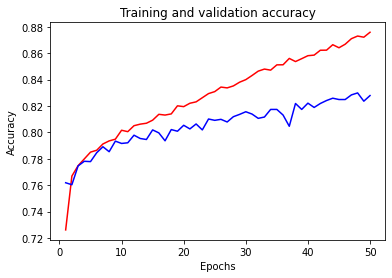

In [78]:
import matplotlib.pyplot as plt 
acc = hist['accuracy']
loss = hist['loss']
val_loss = hist['val_loss']
val_acc = hist['val_accuracy']
epochs = range(1, 51)
plt.plot(epochs, acc, 'r', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

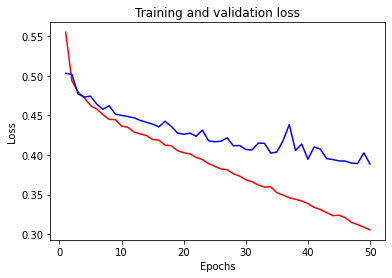

In [79]:
plt.clf()
plt.plot(epochs, loss, 'r', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')